In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() #加载数据集

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  #train_X,test_X,train_y,test_y 
print('训练、测试样本特征大小：{}{}'.format(X_train.shape, X_test.shape)) #显示特征数组结构
print('训练、测试样本类别大小：{}{}'.format(y_train.shape, y_test.shape)) #类别数组结构

训练、测试样本特征大小：(105, 4)(45, 4)
训练、测试样本类别大小：(105,)(45,)


In [2]:
def SVM_test(X_train, X_test, y_train, y_test, C=1.0):
    """训练和预测模型

    Parameters
    ----------
    X_train: 训练集特征
    X_test: 测试集特征
    y_train: 训练集类别
    y_test: 测试集类别

    Returns
    -------
    models: 4个训练的模型组成的列表
    scores: 4个模型对应的准确率组成的列表
    """
    models = [svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=10000),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)]
    models = [clf.fit(X_train, y_train) for clf in models]
    scores = [clf.score(X_test, y_test) for clf in models]
    return models, scores
#使用全部四个特征训练的四种SVM模型
models_ori, scores_ori = SVM_test(X_train, X_test, y_train, y_test)
print(scores_ori)

[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777]


In [3]:
#使用前两个特征训练的四种SVM模型
models_fir2, scores_fir2 = SVM_test(X_train[:,:2], X_test[:,:2], y_train, y_test)
print(scores_fir2)

[0.8444444444444444, 0.8222222222222222, 0.8444444444444444, 0.8444444444444444]


In [4]:
#使用PCA降维为二维的两个特征训练的四种SVM模型
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # n_components 生成特征的维度，这里我们生成2维
pca.fit(X_train) #pca训练
#训练后将数据降维至2维
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#测试四种SVM模型准确率
models_pca, scores_pca = SVM_test(X_train_pca, X_test_pca, y_train, y_test)
print(scores_pca)

[1.0, 0.9777777777777777, 1.0, 0.9777777777777777]


In [5]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params) #绘制等高线（对等高线间的填充区域进行填充）
    #out = ax.contour(xx, yy, Z, **params) #绘制等高线（不填充）
    return out

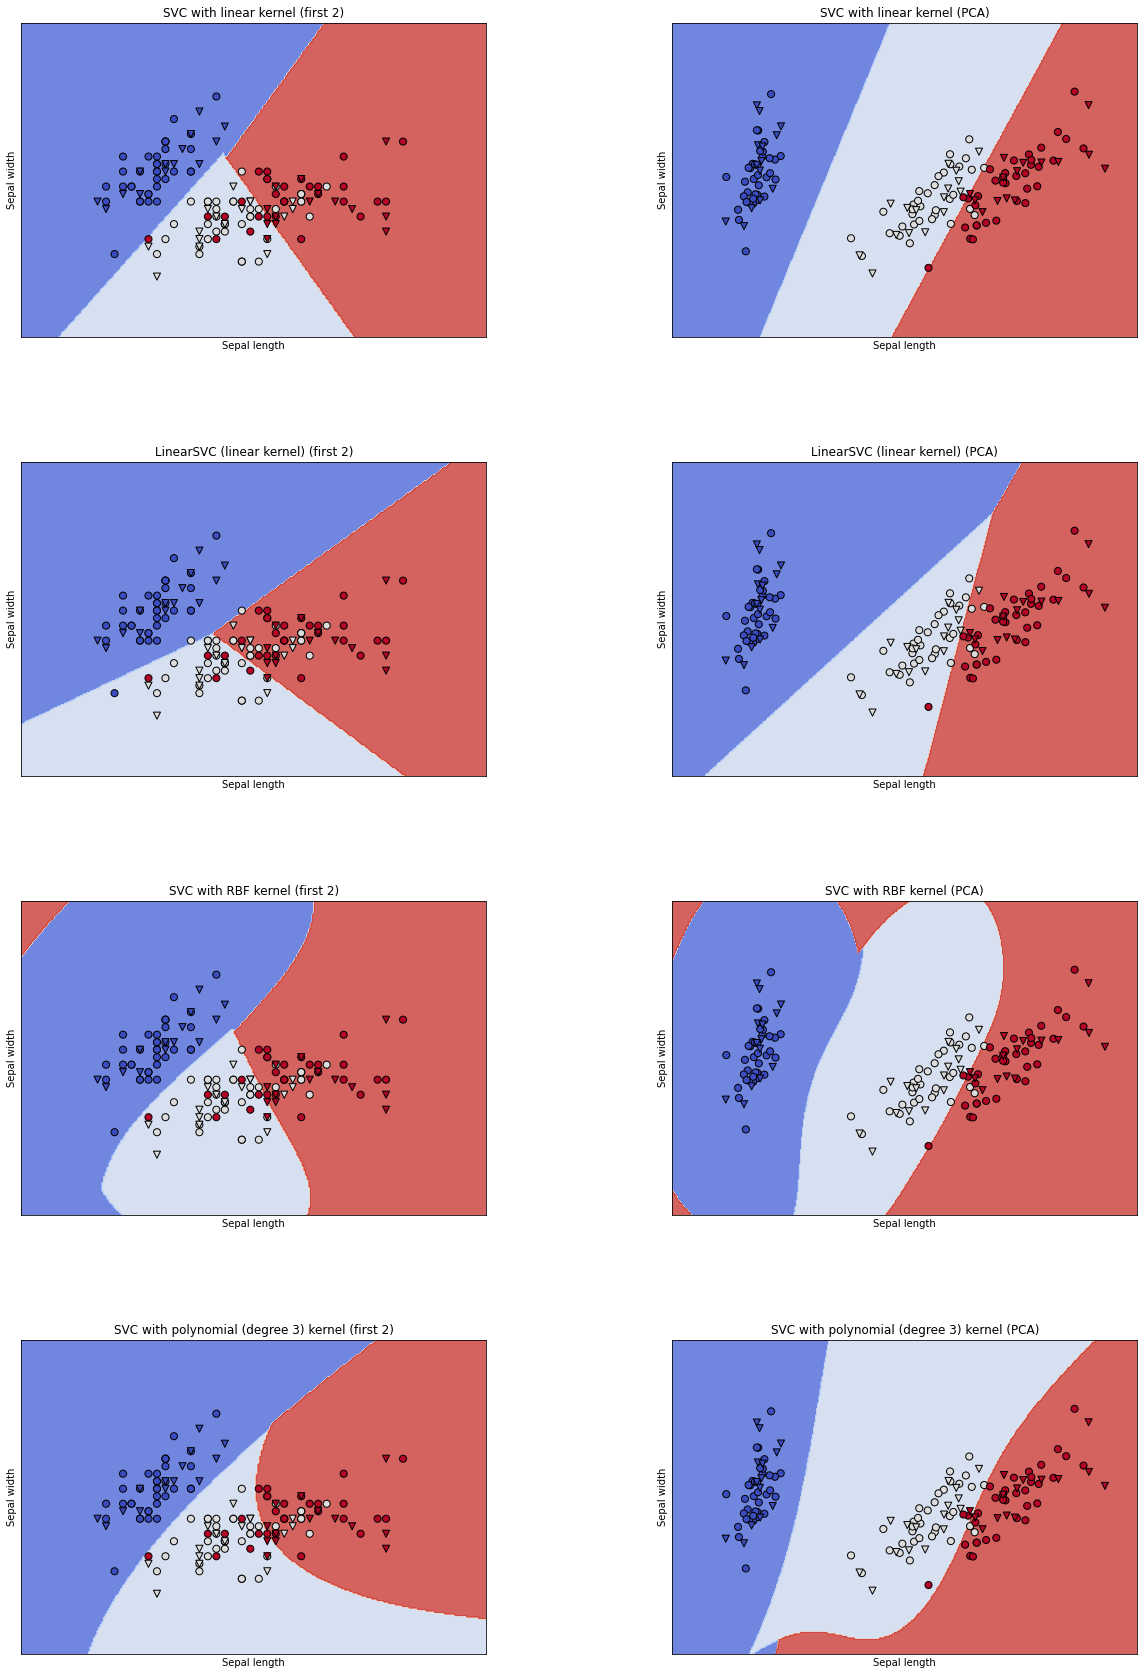

In [6]:
# 每张图的标题
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

# 画一张包含4*2张子图像的图
fig, sub = plt.subplots(4, 2, figsize=(20, 30))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

#绘制图像第一列子图像，为提取数据前两项特征训练结果图
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models_fir2, titles, sub[:,0].flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, marker='o', cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='v', cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title+ ' (first 2)')
    
#绘制图像第二列子图像，为PCA降维后前两项特征训练结果图
X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
xx, yy = make_meshgrid(X0, X1)
for clf, title, ax in zip(models_pca, titles, sub[:,1].flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='v', cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title+ ' (PCA)')    
    
plt.show()